# WACC Calculation - Weighted Average Cost of Capital
- In this analysis, the WACC of a ficticious company has been calculated across various debt to equity ratios and and a final optimal capital structure has been determined

### Import Required Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### WACC Calculation

In [2]:
# Comapny specific settings - to be updated manually

current_debt_to_value = 0.40
unlevered_beta = 1.12
tax_rate = 0.40
rf_rate = 0.05
market_premium = 0.050

In [3]:
# Create two lists one containing the debt to value, and the other containing debt to equity for every
# Percentage point possible (0-100)

debt_to_value = []
debt_to_equity = []

for i in range(0,100,1):
    # Debt to value calculation
    d_v = i / 100
    debt_to_value.append(d_v)
    
    # Debt to equity calculation
    d_e = 1 / (1 - d_v) - 1
    debt_to_equity.append(d_e)

In [4]:
# The previously created lists are stored in a dataframe for easier calculation
wacc_df = pd.DataFrame({'debt_to_value': debt_to_value, 'debt_to_equity': debt_to_equity})

In [5]:
# Levered beta is calculated across each stage of debt to equity and add the value to the dataframe
wacc_df['leveraged_beta'] = unlevered_beta * (1 + (1 - tax_rate) * wacc_df['debt_to_equity'])

In [7]:
# Cost of equity
wacc_df['cost_of_equity'] = rf_rate + wacc_df['leveraged_beta'] * market_premium

In [8]:
# Cost of debt, (the cost of debt typically increases at the higher levels of debt to value)
c_d = []

for i in range(0,100,1):
    d_v = i / 100
    
    if d_v <= 0.10:
        c_d.append(.052)
        
    elif d_v <= 0.20:
        c_d.append(.0625)
    
    elif d_v <= 0.30:
        c_d.append(.0650)
        
    elif d_v <= 0.40:
        c_d.append(.0825)
        
    elif d_v <= 0.50:
        c_d.append(.10)

    elif d_v <= 0.60:
        c_d.append(.10)
        
    else:
        c_d.append(.125)

wacc_df['cost_of_debt'] = c_d

In [9]:
# Combine the various cost of equity and cost of debt values to obtain the WACC values
wacc_df['wacc'] = ((1 - wacc_df['debt_to_value']) * wacc_df['cost_of_equity'] + 
                   (1 - tax_rate) * wacc_df['cost_of_debt'] * wacc_df['debt_to_value'])

In [10]:
# Visualize the resulting dataframe
wacc_df

,debt_to_value,debt_to_equity,leveraged_beta,cost_of_equity,cost_of_debt,wacc
0,0.00,0.000000,1.120000,0.106000,0.052,0.106000
1,0.01,0.010101,1.126788,0.106339,0.052,0.105588
2,0.02,0.020408,1.133714,0.106686,0.052,0.105176
3,0.03,0.030928,1.140784,0.107039,0.052,0.104764
4,0.04,0.041667,1.148000,0.107400,0.052,0.104352
...,...,...,...,...,...,...
95,0.95,19.000000,13.888000,0.744400,0.125,0.108470
96,0.96,24.000000,17.248000,0.912400,0.125,0.108496
97,0.97,32.333333,22.848000,1.192400,0.125,0.108522
98,0.98,49.000000,34.048000,1.752400,0.125,0.108548


### Discovering the Optimal Debt to Value Ratio

In [11]:
# Discover what the minimal weighted average cost of capital would theoretically be
min_cost = wacc_df[wacc_df['wacc'] == wacc_df['wacc'].min()]

print(min_cost['wacc'])

30    0.09598
Name: wacc, dtype: float64


In [13]:
# Depending on the specific requirements, a reduction of debt from the minimum cost can be used 
# in order to be more conservative in borrowing in the case of undue circumstances

debt_ratio_reduction = 0.05

optimal_line = min_cost['debt_to_value'].unique()[0] - debt_ratio_reduction

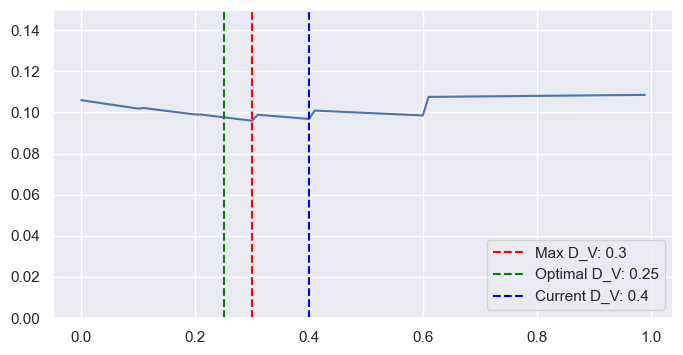

In [16]:
# Visualize the cost of capital across the various levels of debt financing

# Set plot size
sns.set(rc={'figure.figsize':(8,4)})
plt.ylim(0,0.15)

# Plot the various cost of capital values across different levels of borrowing
plt.plot(wacc_df['debt_to_value'], wacc_df['wacc'])

# Plot a vertical line at the lowest cost of capital and set as the maximum D_V
min_line = min_cost['debt_to_value'].unique()[0]
plt.axvline(min_line, color='red', linestyle = '--',
            label = 'Max D_V: ' + str(min_line))

# Plot a vertical line at the previously established optimal level of debt
plt.axvline(optimal_line, color='green', linestyle = '--',
            label = 'Optimal D_V: ' + str(optimal_line))

# Plot a vertical line at the current WACC
plt.axvline(current_debt_to_value, color='blue', linestyle = '--', 
            label = 'Current D_V: ' + str(current_debt_to_value))


plt.legend(loc="lower right")
plt.show()